# Analytics — Camada RAW (CSV)

Este notebook faz uma análise exploratória **apenas com os dados brutos do CSV** (camada RAW), **sem tratamento/limpeza**.
A ideia é:
- entender o formato/qualidade do dataset
- tirar métricas simples (rankings e distribuições)
- identificar inconsistências que justificam a camada SILVER

> Observação: para **visualizações**, algumas colunas podem ser **convertidas apenas para leitura** (ex.: `to_numeric(errors="coerce")`),
sem alterar o arquivo original. Isso não é “tratamento”, é só para conseguir contar/plotar.

## 1) Carregar CSV RAW

In [214]:
import pandas as pd

df_raw = pd.read_csv("datatran2025.csv", encoding="latin-1", sep=";", low_memory=False)
df_raw.shape



(65683, 30)

## 2) Inspeção inicial

In [215]:
df_raw.head(10)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG
5,652569,2025-01-01,quarta-feira,10:40:00,MT,70,669,CACERES,Transitar na contramão,Colisão frontal,...,0,1,2,0,5,"-16,04148578","-57,25884017",SPRF-MT,DEL03-MT,UOP02-DEL03-MT
6,652573,2025-01-01,quarta-feira,12:23:00,RS,116,376,TAPES,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,1,1,2,"-30,739714","-51,62594",SPRF-RS,DEL02-RS,UOP02-DEL02-RS
7,652617,2025-01-01,quarta-feira,17:45:00,SC,101,"207,4",SAO JOSE,Ausência de reação do condutor,Colisão traseira,...,0,1,0,1,2,"-27,60001226","-48,6226467",SPRF-SC,DEL01-SC,UOP01-DEL01-SC
8,652625,2025-01-01,quarta-feira,18:40:00,MG,116,"708,5",MURIAE,Velocidade Incompatível,Tombamento,...,0,0,1,0,2,"-21,16328873","-42,37968988",SPRF-MG,DEL07-MG,UOP02-DEL07-MG
9,652648,2025-01-01,quarta-feira,17:00:00,PE,407,"7,4",AFRANIO,Demais falhas mecânicas ou elétricas,Incêndio,...,0,2,0,0,1,"-8,47503105","-41,0137105",SPRF-PE,DEL06-PE,UOP02-DEL06-PE


In [216]:
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 65683 entries, 0 to 65682
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      65683 non-null  int64
 1   data_inversa            65683 non-null  str  
 2   dia_semana              65683 non-null  str  
 3   horario                 65683 non-null  str  
 4   uf                      65683 non-null  str  
 5   br                      65683 non-null  int64
 6   km                      65683 non-null  str  
 7   municipio               65683 non-null  str  
 8   causa_acidente          65683 non-null  str  
 9   tipo_acidente           65683 non-null  str  
 10  classificacao_acidente  65682 non-null  str  
 11  fase_dia                65683 non-null  str  
 12  sentido_via             65683 non-null  str  
 13  condicao_metereologica  65683 non-null  str  
 14  tipo_pista              65683 non-null  str  
 15  tracado_via             65683 

In [217]:
# Lista de colunas
list(df_raw.columns)

['id',
 'data_inversa',
 'dia_semana',
 'horario',
 'uf',
 'br',
 'km',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'uso_solo',
 'pessoas',
 'mortos',
 'feridos_leves',
 'feridos_graves',
 'ilesos',
 'ignorados',
 'feridos',
 'veiculos',
 'latitude',
 'longitude',
 'regional',
 'delegacia',
 'uop']

## 4) Qualidade (nulos e cardinalidade)

In [218]:
# Nulos por coluna
nulls = df_raw.isna().sum().sort_values(ascending=False)
nulls_pct = (nulls / len(df_raw) * 100).round(4)

qualidade = pd.DataFrame({"n_nulos": nulls, "pct_nulos": nulls_pct})
qualidade.head(30)

,n_nulos,pct_nulos
uop,36,0.0548
delegacia,22,0.0335
regional,2,0.0030
classificacao_acidente,1,0.0015
dia_semana,0,0.0000
id,0,0.0000
br,0,0.0000
km,0,0.0000
causa_acidente,0,0.0000
municipio,0,0.0000


In [219]:
# Cardinalidade (valores distintos) por coluna
card = df_raw.nunique(dropna=True).sort_values(ascending=False)
card.head(25)

id                        65683
latitude                  62627
longitude                 62586
km                         7485
municipio                  1823
horario                    1406
tracado_via                 588
uop                         395
data_inversa                334
delegacia                   153
br                          113
causa_acidente               69
pessoas                      64
ilesos                       56
feridos                      37
feridos_leves                33
regional                     28
uf                           27
veiculos                     21
feridos_graves               19
ignorados                    18
tipo_acidente                17
mortos                       11
condicao_metereologica        9
dia_semana                    7
dtype: int64

## 6) Rankings por UF (acidentes, mortos, feridos)

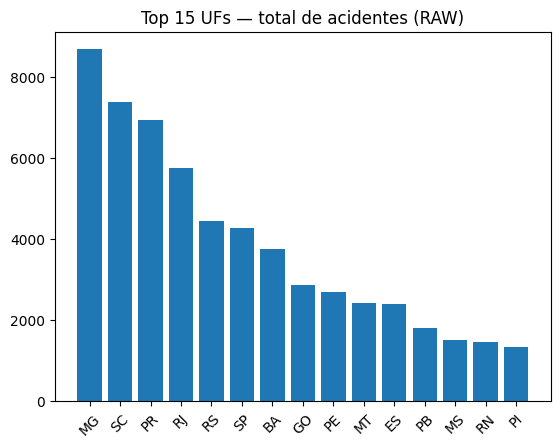

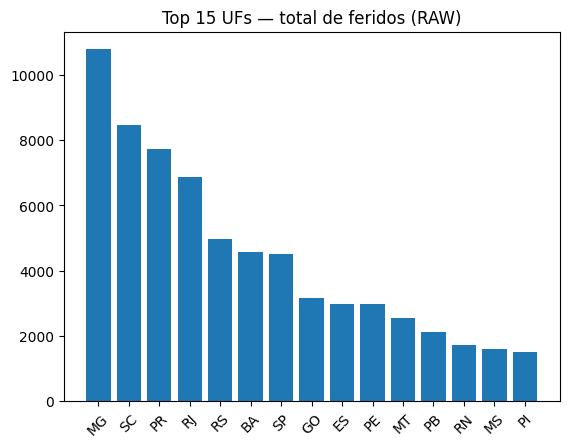

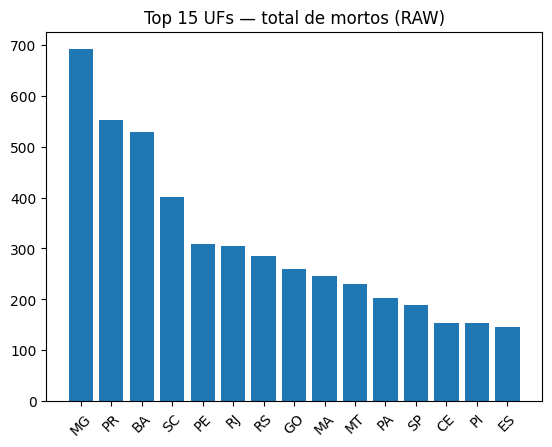

In [220]:
def bar_top(df, x, y, title, top=15):
    import matplotlib.pyplot as plt
    d = df.head(top).copy()
    plt.figure()
    plt.bar(d[x].astype(str), d[y])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

if "uf" in df_raw.columns:
    acidentes_uf = df_raw.groupby("uf", dropna=False).size().sort_values(ascending=False).rename("acidentes").reset_index()
    
    bar_top(acidentes_uf, "uf", "acidentes", "Top 15 UFs — total de acidentes (RAW)")

if "uf" in df_raw.columns and "feridos" in df_raw.columns:
    feridos_uf = (
        df_raw.assign(feridos_num=pd.to_numeric(df_raw["feridos"], errors="coerce"))
              .groupby("uf", dropna=False)["feridos_num"]
              .sum()
              .sort_values(ascending=False)
              .rename("feridos")
              .reset_index()
    )
    bar_top(feridos_uf, "uf", "feridos", "Top 15 UFs — total de feridos (RAW)")

if "uf" in df_raw.columns and "mortos" in df_raw.columns:
    mortos_uf = (
        df_raw.assign(mortos_num=pd.to_numeric(df_raw["mortos"], errors="coerce"))
              .groupby("uf", dropna=False)["mortos_num"]
              .sum()
              .sort_values(ascending=False)
              .rename("mortos")
              .reset_index()
    )
    
    bar_top(mortos_uf, "uf", "mortos", "Top 15 UFs — total de mortos (RAW)")



## 7) Top Municípios e Top BRs (acidentes e mortos)

In [221]:
import pandas as pd

if "municipio" in df_raw.columns:
    top_mun = df_raw.groupby("municipio", dropna=False).size().sort_values(ascending=False).head(20).rename("acidentes").reset_index()
    display(top_mun)

if "municipio" in df_raw.columns and "mortos" in df_raw.columns:
    top_mun_mortos = (
        df_raw.assign(mortos_num=pd.to_numeric(df_raw["mortos"], errors="coerce"))
              .groupby("municipio", dropna=False)["mortos_num"]
              .sum()
              .sort_values(ascending=False)
              .head(20)
              .rename("mortos")
              .reset_index()
    )
    display(top_mun_mortos)

,municipio,acidentes
0,BRASILIA,926
1,DUQUE DE CAXIAS,755
2,GUARULHOS,697
3,SAO JOSE,678
4,CURITIBA,637
5,BETIM,618
6,SERRA,529
7,RECIFE,528
8,PALHOCA,511
9,JOAO PESSOA,498


,municipio,mortos
0,BRASILIA,43
1,FEIRA DE SANTANA,30
2,SAO JOSE DOS PINHAIS,29
3,CURITIBA,28
4,CASCAVEL,28
5,RECIFE,26
6,CAMPOS DOS GOYTACAZES,25
7,DUQUE DE CAXIAS,24
8,TERESINA,23
9,CAMPO GRANDE,21


## 8) Tempo (dia da semana, fase do dia, hora)

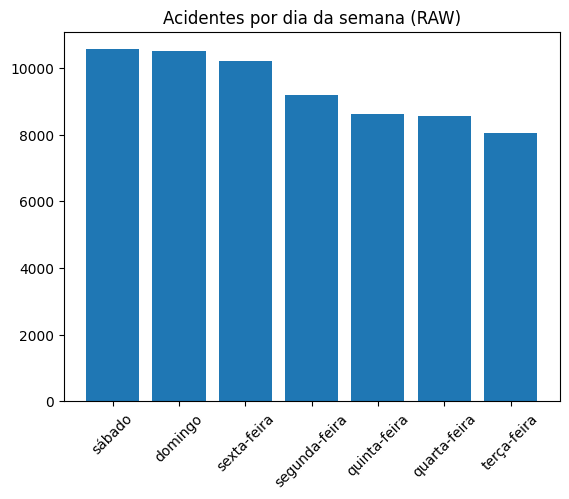

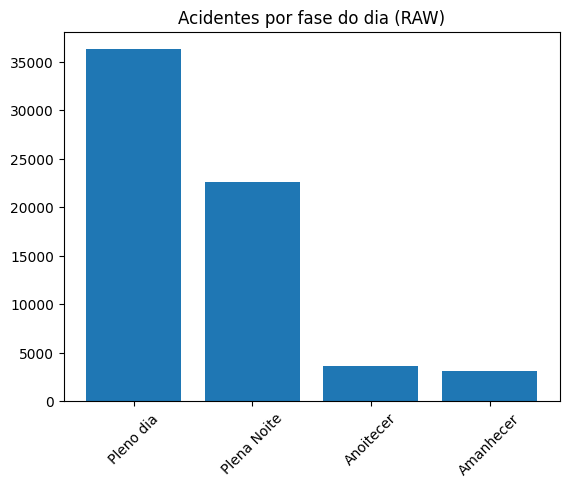

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_df(df, x, y, title, top=None):
    d = df.copy()
    if top is not None:
        d = d.head(top)
    plt.figure()
    plt.bar(d[x].astype(str), d[y])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

if "dia_semana" in df_raw.columns:
    dia_semana = df_raw.groupby("dia_semana", dropna=False).size().sort_values(ascending=False).rename("acidentes").reset_index()
    bar_df(dia_semana, "dia_semana", "acidentes", "Acidentes por dia da semana (RAW)")

if "fase_dia" in df_raw.columns:
    fase = df_raw.groupby("fase_dia", dropna=False).size().sort_values(ascending=False).rename("acidentes").reset_index()
    
    bar_df(fase, "fase_dia", "acidentes", "Acidentes por fase do dia (RAW)")

if "horario" in df_raw.columns:
    hora_str = df_raw["horario"].astype("string")
    hora = pd.to_numeric(hora_str.str.slice(0, 2), errors="coerce")
    por_hora = hora.value_counts(dropna=False).sort_index().rename_axis("hora").reset_index(name="acidentes")
   

## 9) Tipos e causas (Top 20)

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

def top_counts(col, n=70):
    if col not in df_raw.columns:
        print(f"Coluna ausente: {col}")
        return None
    return (df_raw.groupby(col, dropna=False).size().sort_values(ascending=False).head(n).rename("acidentes").reset_index())

def bar_df(df, x, y, title, top=None):
    d = df.copy()
    if top is not None:
        d = d.head(top)
    plt.figure()
    plt.bar(d[x].astype(str), d[y])
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

top_causa = top_counts("causa_acidente", 69)
top_tipo  = top_counts("tipo_acidente", 20)
top_class = top_counts("classificacao_acidente", 3)

if top_causa is not None:
    display(top_causa)

if top_tipo is not None:
    display(top_tipo)

if top_class is not None:
    display(top_class)

,causa_acidente,acidentes
0,Ausência de reação do condutor,10322
1,Reação tardia ou ineficiente do condutor,9732
2,Acessar a via sem observar a presença dos outr...,6459
3,Condutor deixou de manter distância do veículo...,4028
4,Velocidade Incompatível,3683
...,...,...
64,Faróis desregulados,8
65,Semáforo com defeito,8
66,Redutor de velocidade em desacordo,7
67,Sistema de drenagem ineficiente,2


,tipo_acidente,acidentes
0,Colisão traseira,13050
1,Saída de leito carroçável,9140
2,Colisão transversal,8541
3,Colisão lateral mesmo sentido,7114
4,Tombamento,5747
5,Colisão com objeto,4602
6,Colisão frontal,4293
7,Queda de ocupante de veículo,3137
8,Atropelamento de Pedestre,2774
9,Colisão lateral sentido oposto,1928


,classificacao_acidente,acidentes
0,Com Vítimas Feridas,50885
1,Sem Vítimas,10072
2,Com Vítimas Fatais,4725


## 10) Condições externas (Top 20)

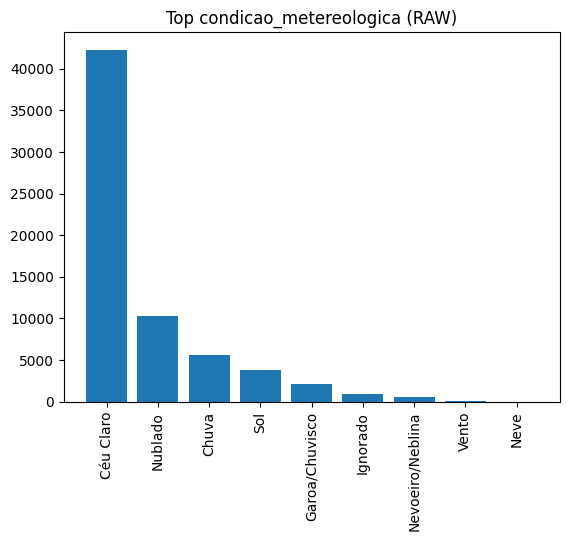

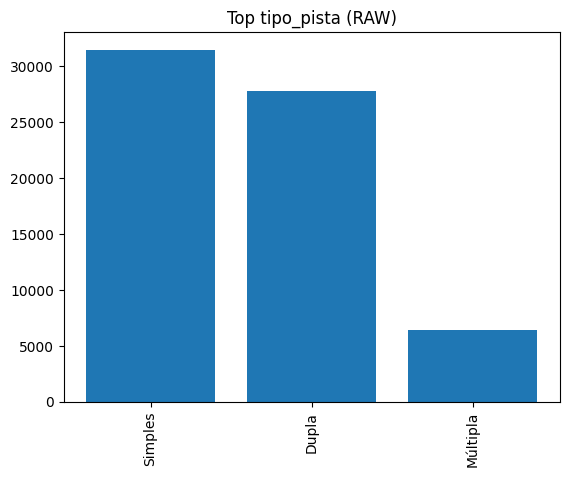

In [224]:
import matplotlib.pyplot as plt

def top_counts(col, n=20):
    if col not in df_raw.columns:
        print(f"Coluna ausente: {col}")
        return None
    return (df_raw.groupby(col, dropna=False).size().sort_values(ascending=False).head(n).rename("acidentes").reset_index())

def bar_df(df, x, y, title, top=None):
    d = df.copy()
    if top is not None:
        d = d.head(top)
    plt.figure()
    plt.bar(d[x].astype(str), d[y])
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

for col in ["condicao_metereologica", "tipo_pista"]:
    t = top_counts(col, 20)
    if t is not None:
        bar_df(t, col, "acidentes", f"Top {col} (RAW)", top=15)

## 11) Geografia (lat/long) — validação simples

Total linhas: 65683
Lat/Long válidos: 65683
Lat/Long inválidos ou ausentes: 0


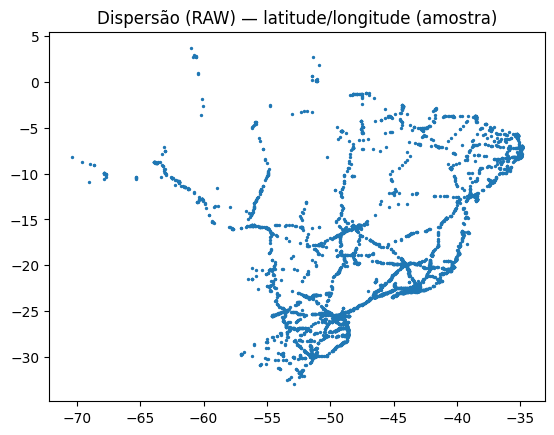

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

if "latitude" in df_raw.columns and "longitude" in df_raw.columns:
    # conversão apenas para visualizar (RAW permanece intacto)
    lat = pd.to_numeric(df_raw["latitude"].astype("string").str.replace(",", ".", regex=False), errors="coerce")
    lon = pd.to_numeric(df_raw["longitude"].astype("string").str.replace(",", ".", regex=False), errors="coerce")

    valid_geo = (lat.between(-90, 90) & lon.between(-180, 180))
    print("Total linhas:", len(df_raw))
    print("Lat/Long válidos:", int(valid_geo.sum()))
    print("Lat/Long inválidos ou ausentes:", int((~valid_geo).sum()))

    # Scatter simples (amostra) — evita travar com muitos pontos
    n = min(5000, len(df_raw))
    sample = df_raw.sample(n, random_state=42)
    lat_s = pd.to_numeric(sample["latitude"].astype("string").str.replace(",", ".", regex=False), errors="coerce")
    lon_s = pd.to_numeric(sample["longitude"].astype("string").str.replace(",", ".", regex=False), errors="coerce")

    mask = lat_s.between(-90, 90) & lon_s.between(-180, 180)
    plt.figure()
    plt.scatter(lon_s[mask], lat_s[mask], s=2)
    plt.title("Dispersão (RAW) — latitude/longitude (amostra)")
    plt.show()
else:
    print("Não há latitude/longitude no dataset (ou colunas não encontradas).")